In [13]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Handling Test data

In [14]:
test_df = pd.read_csv(r"C:\Users\2005m\Downloads\test.csv")
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [15]:
test_df.shape

(1459, 80)

In [16]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [18]:
# Summary statistics for all columns
print(test_df.describe(include='all'))

                 Id   MSSubClass MSZoning  LotFrontage       LotArea Street  \
count   1459.000000  1459.000000     1455  1232.000000   1459.000000   1459   
unique          NaN          NaN        5          NaN           NaN      2   
top             NaN          NaN       RL          NaN           NaN   Pave   
freq            NaN          NaN     1114          NaN           NaN   1453   
mean    2190.000000    57.378341      NaN    68.580357   9819.161069    NaN   
std      421.321334    42.746880      NaN    22.376841   4955.517327    NaN   
min     1461.000000    20.000000      NaN    21.000000   1470.000000    NaN   
25%     1825.500000    20.000000      NaN    58.000000   7391.000000    NaN   
50%     2190.000000    50.000000      NaN    67.000000   9399.000000    NaN   
75%     2554.500000    70.000000      NaN    80.000000  11517.500000    NaN   
max     2919.000000   190.000000      NaN   200.000000  56600.000000    NaN   

       Alley LotShape LandContour Utilities  ...  S

In [19]:
numerical_cols = test_df.select_dtypes(include=['int64', 'float64']).columns

In [20]:
categorical_cols = test_df.select_dtypes(include=['object']).columns

In [21]:
print("Categorical Columns:", categorical_cols)
print("\nNumerical Columns:", numerical_cols)

Categorical Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Numerical Columns: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullB

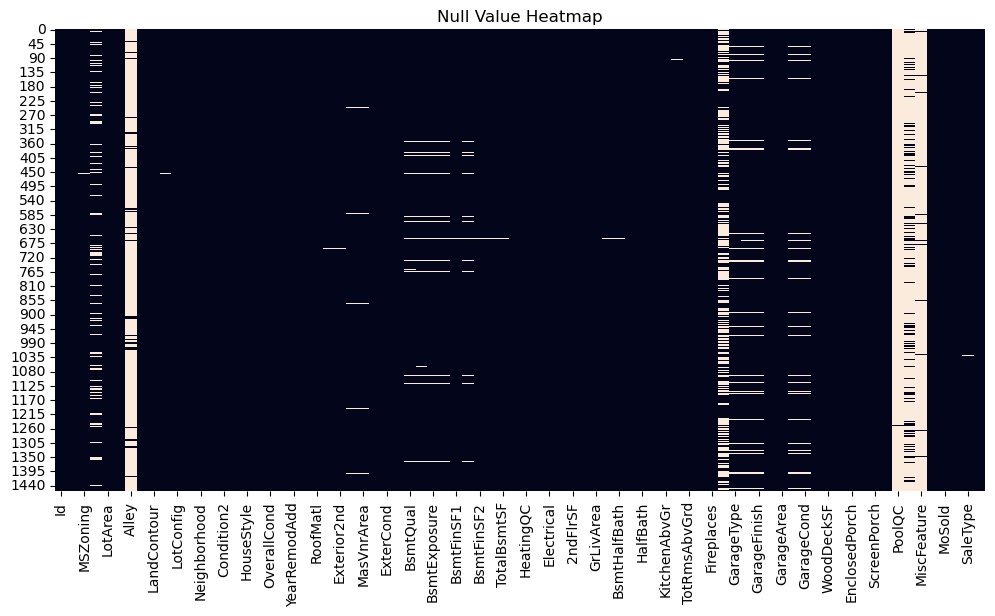

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(test_df.isnull(), cbar=False)
plt.title('Null Value Heatmap')
plt.show()

In [23]:
test_df[numerical_cols] = test_df[numerical_cols].fillna(test_df[numerical_cols].mean())

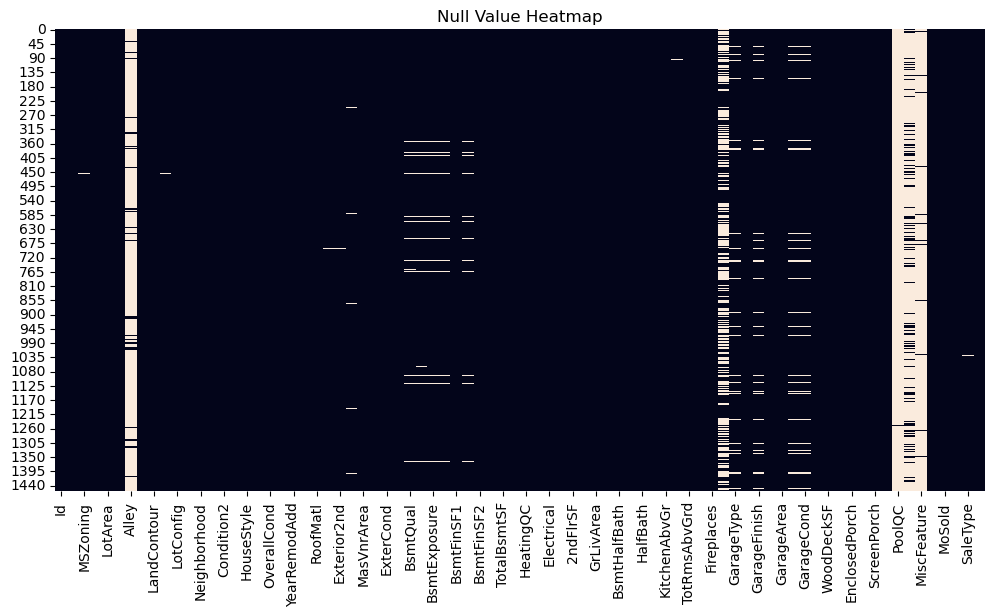

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(test_df.isnull(), cbar=False)
plt.title('Null Value Heatmap')
plt.show()

In [25]:
# Fill missing values in categorical columns with the mode
test_df[categorical_cols] = test_df[categorical_cols].fillna(test_df[categorical_cols].mode().iloc[0])

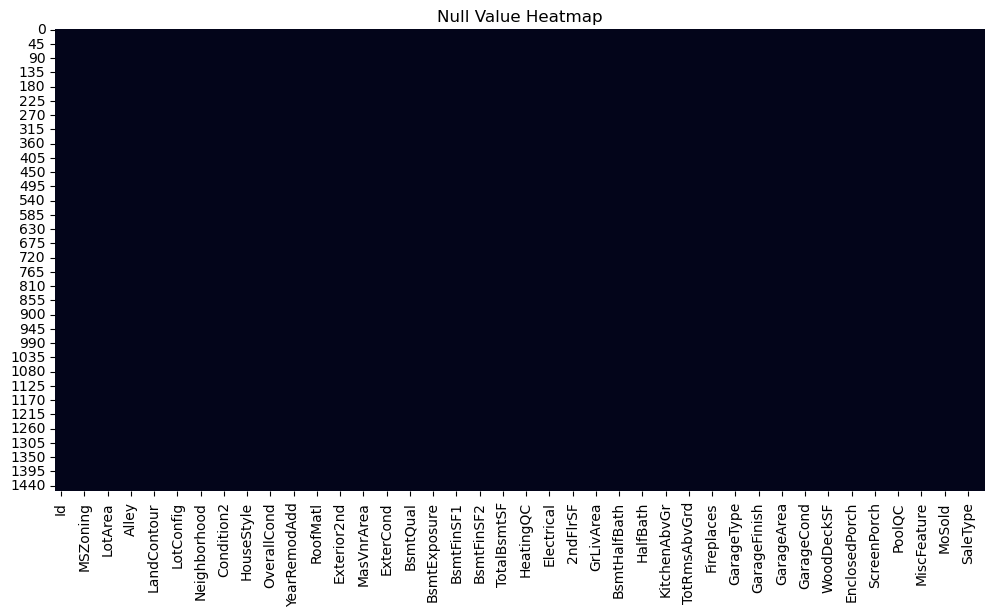

In [26]:
plt.figure(figsize=(12, 6))
sns.heatmap(test_df.isnull(), cbar=False)
plt.title('Null Value Heatmap')
plt.show()

In [27]:
test_df.to_csv('handled_test.csv',index=False)

# Data Analysis of train data

In [28]:
df = pd.read_csv(r"C:\Users\2005m\Downloads\train.csv")  # reads the csv file completely with every column and row
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [29]:
df.head() # to display just the first few rows of the Dataframe.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [30]:
df.shape # no. of columns and rows

(1460, 81)

In [31]:
df.isnull().sum() # shows all the null values/ missing values from each column

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [32]:
df.info() # to obtain a concise summary of a DataFrame's structure and content

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data visualization

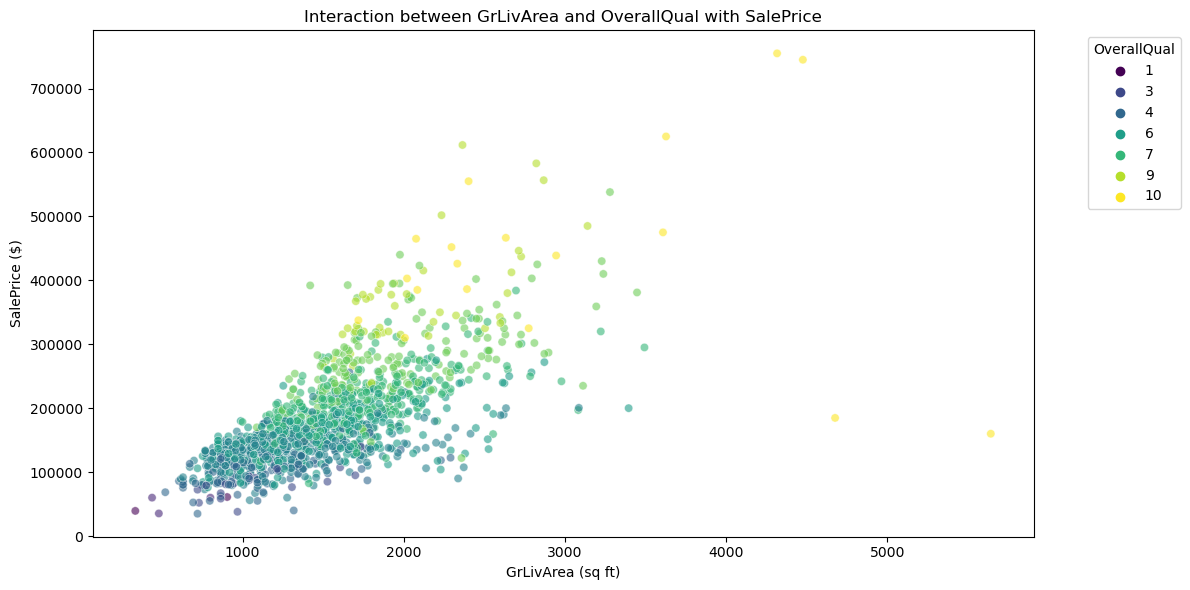

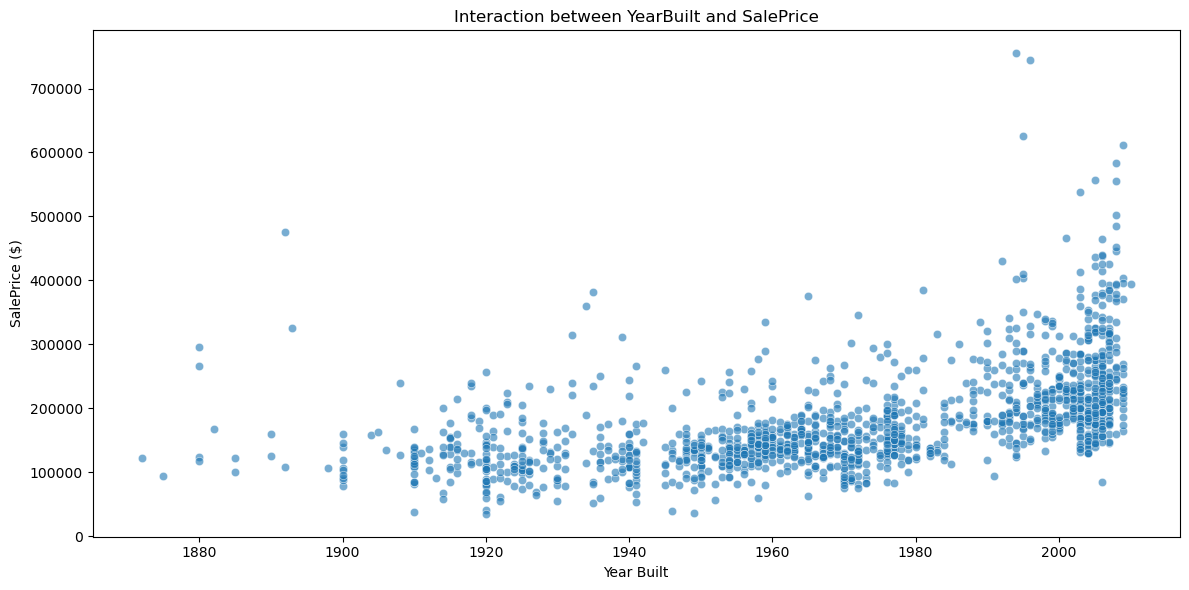

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='viridis', alpha=0.6)
plt.title('Interaction between GrLivArea and OverallQual with SalePrice')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('SalePrice ($)')
plt.legend(title='OverallQual', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Interaction Plot for 'YearBuilt' and 'SalePrice'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice', alpha=0.6)
plt.title('Interaction between YearBuilt and SalePrice')
plt.xlabel('Year Built')
plt.ylabel('SalePrice ($)')
plt.tight_layout()
plt.show()

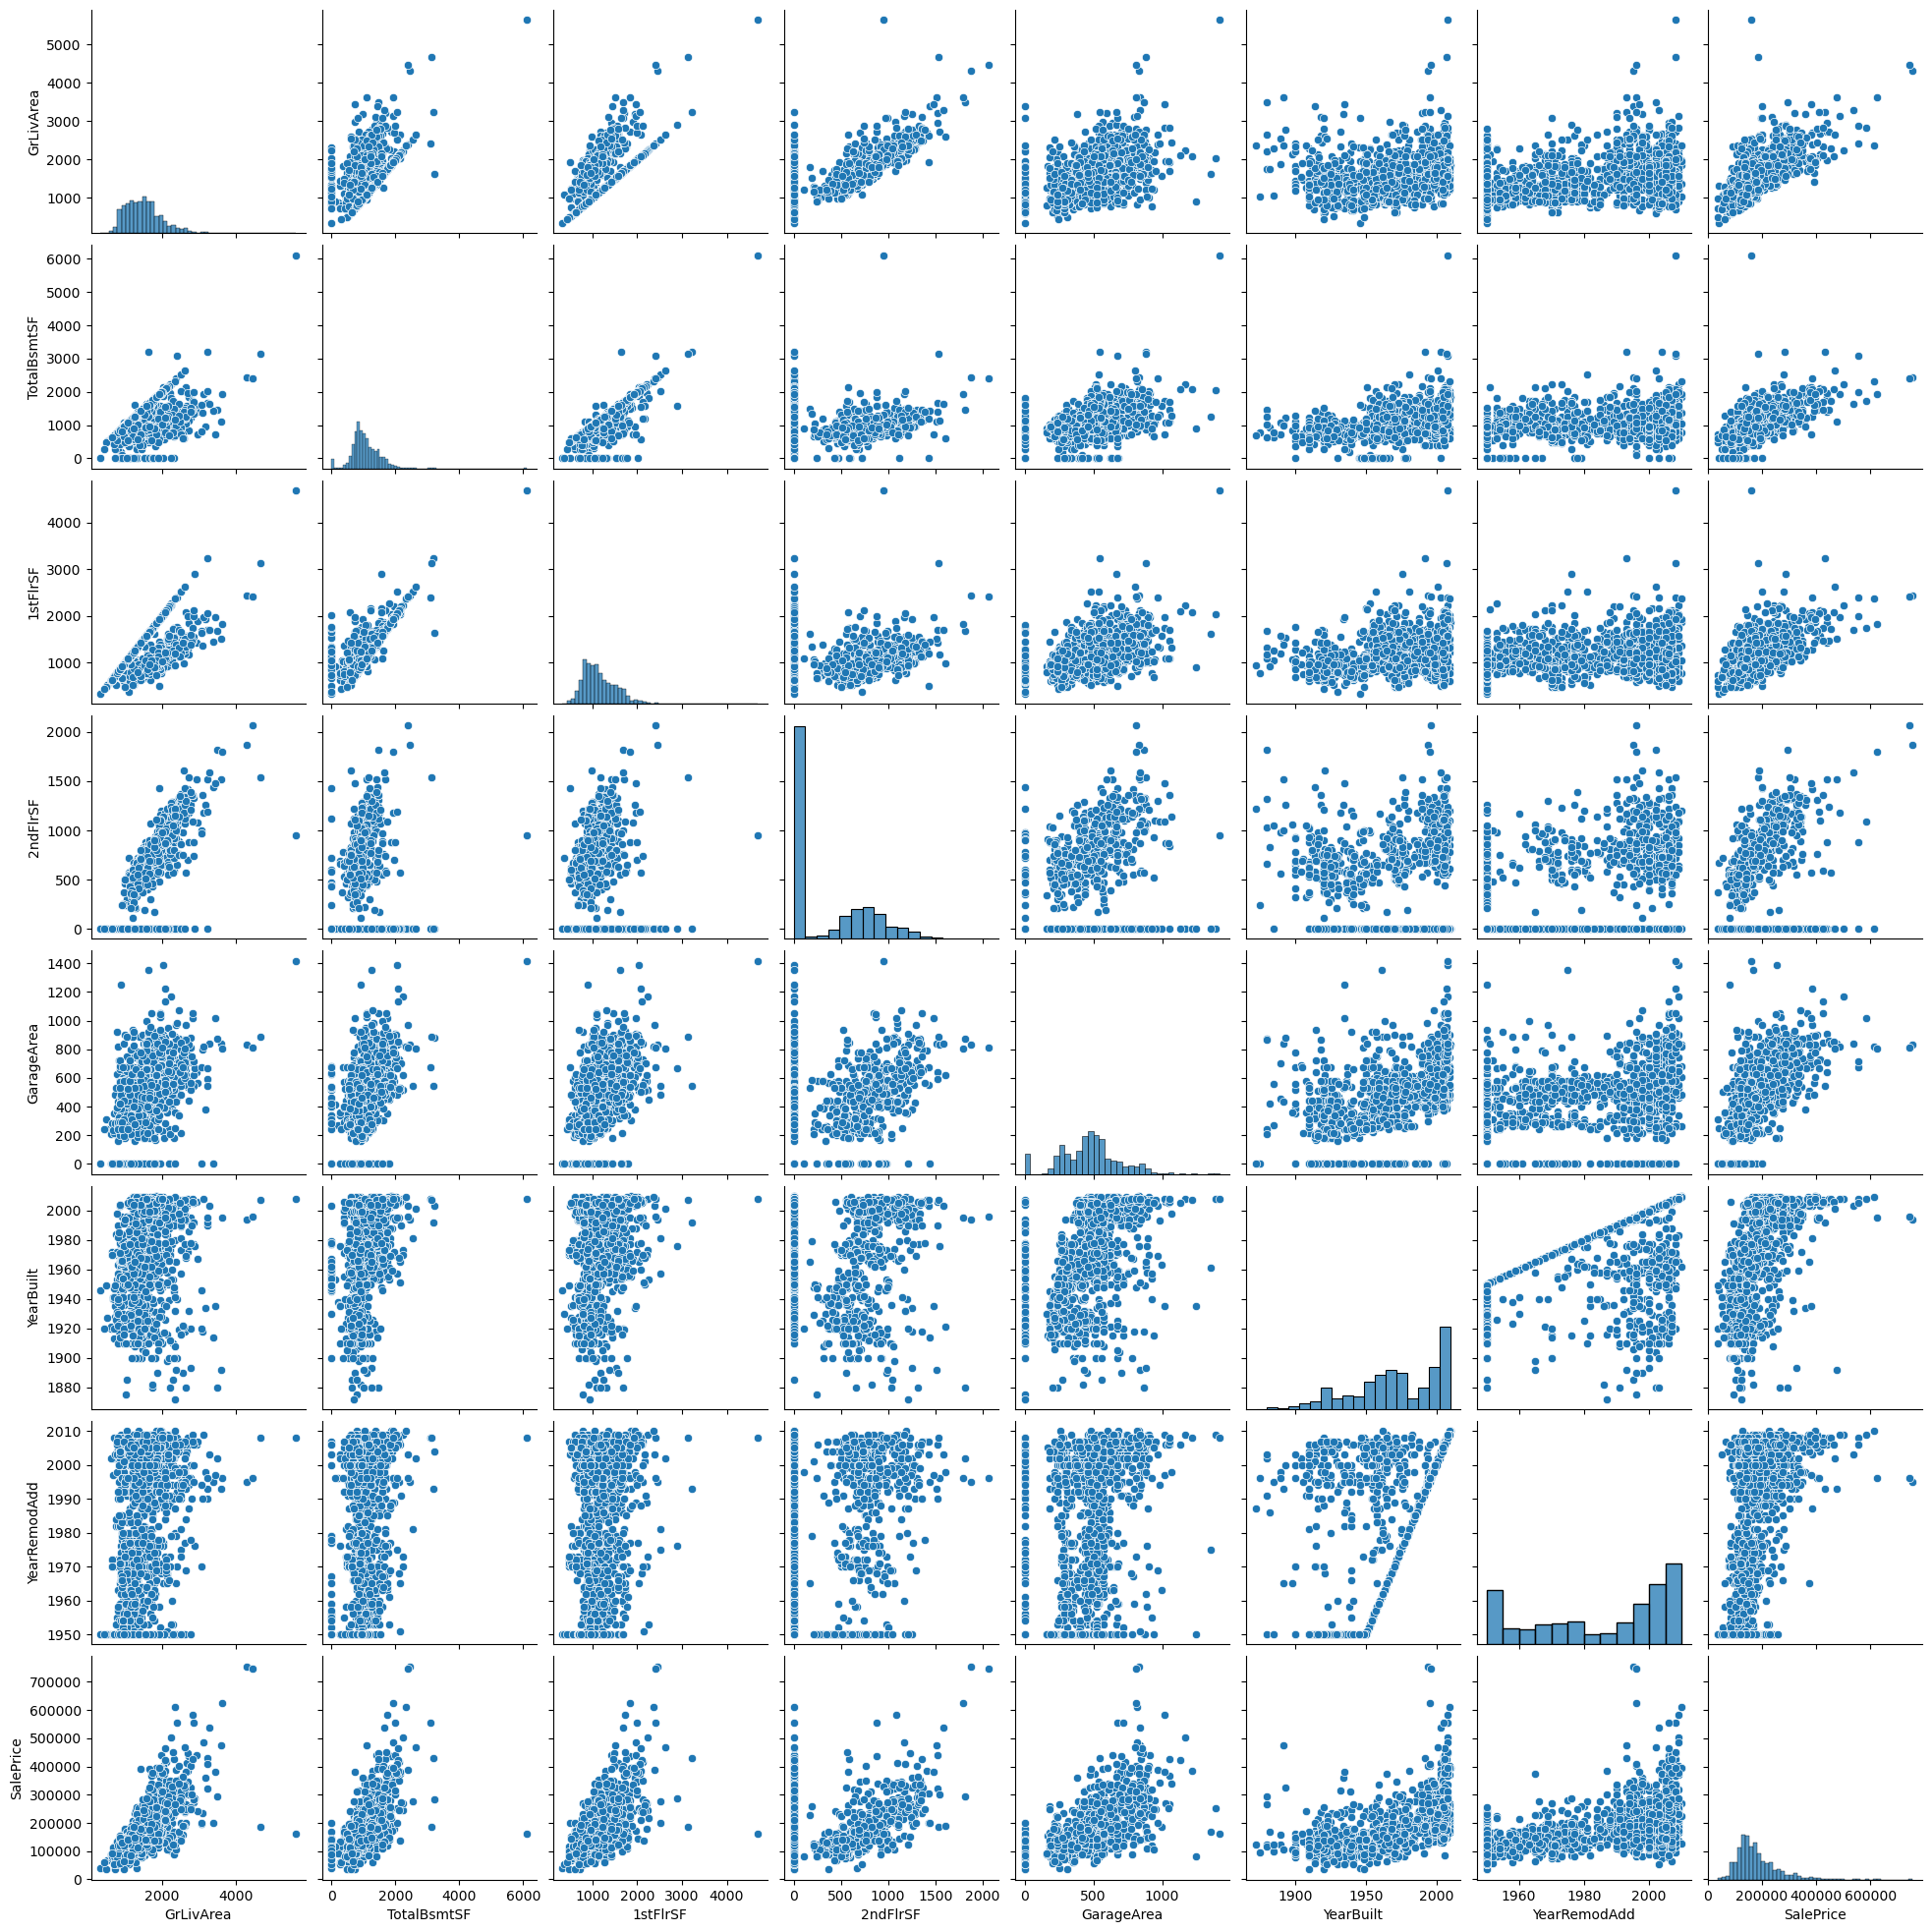

In [34]:
# pair plot
num_vars = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

sns.pairplot(df[num_vars])

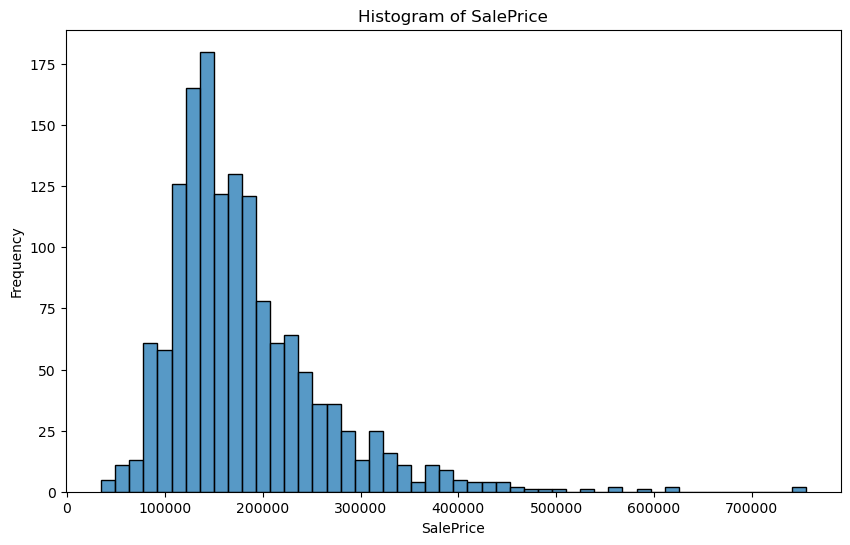

In [35]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=50)
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

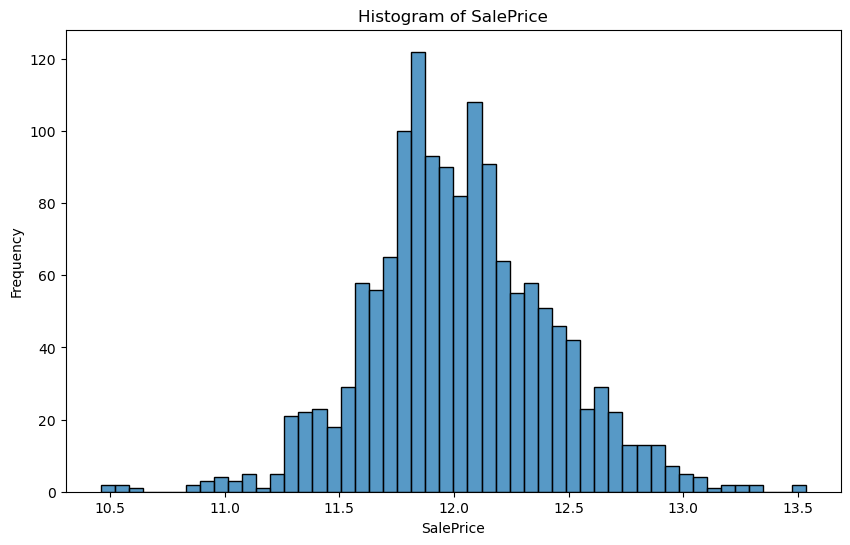

In [36]:
# Histogram of SalePrice with the skewness fixed
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df['SalePrice']), bins=50)
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

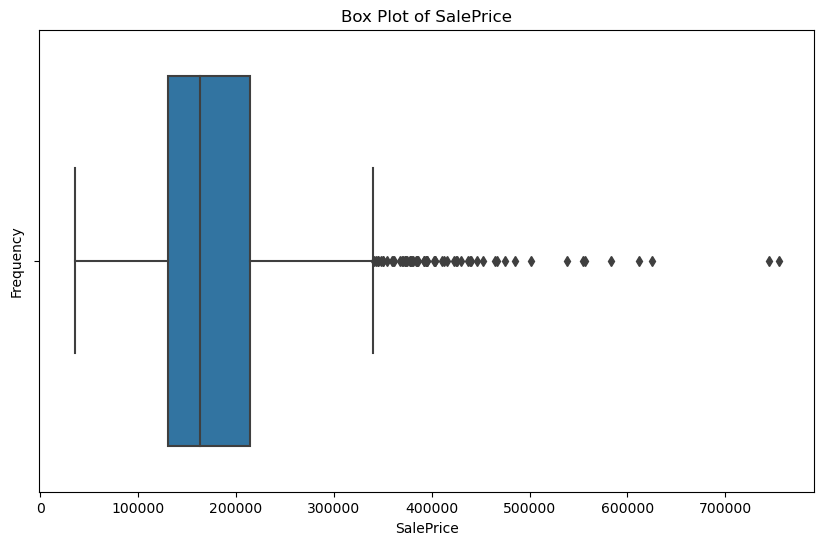

In [37]:
# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='SalePrice', data=df)
plt.title('Box Plot of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

C:\Users\2005m\AppData\Local\Temp\ipykernel_17900\1541219428.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


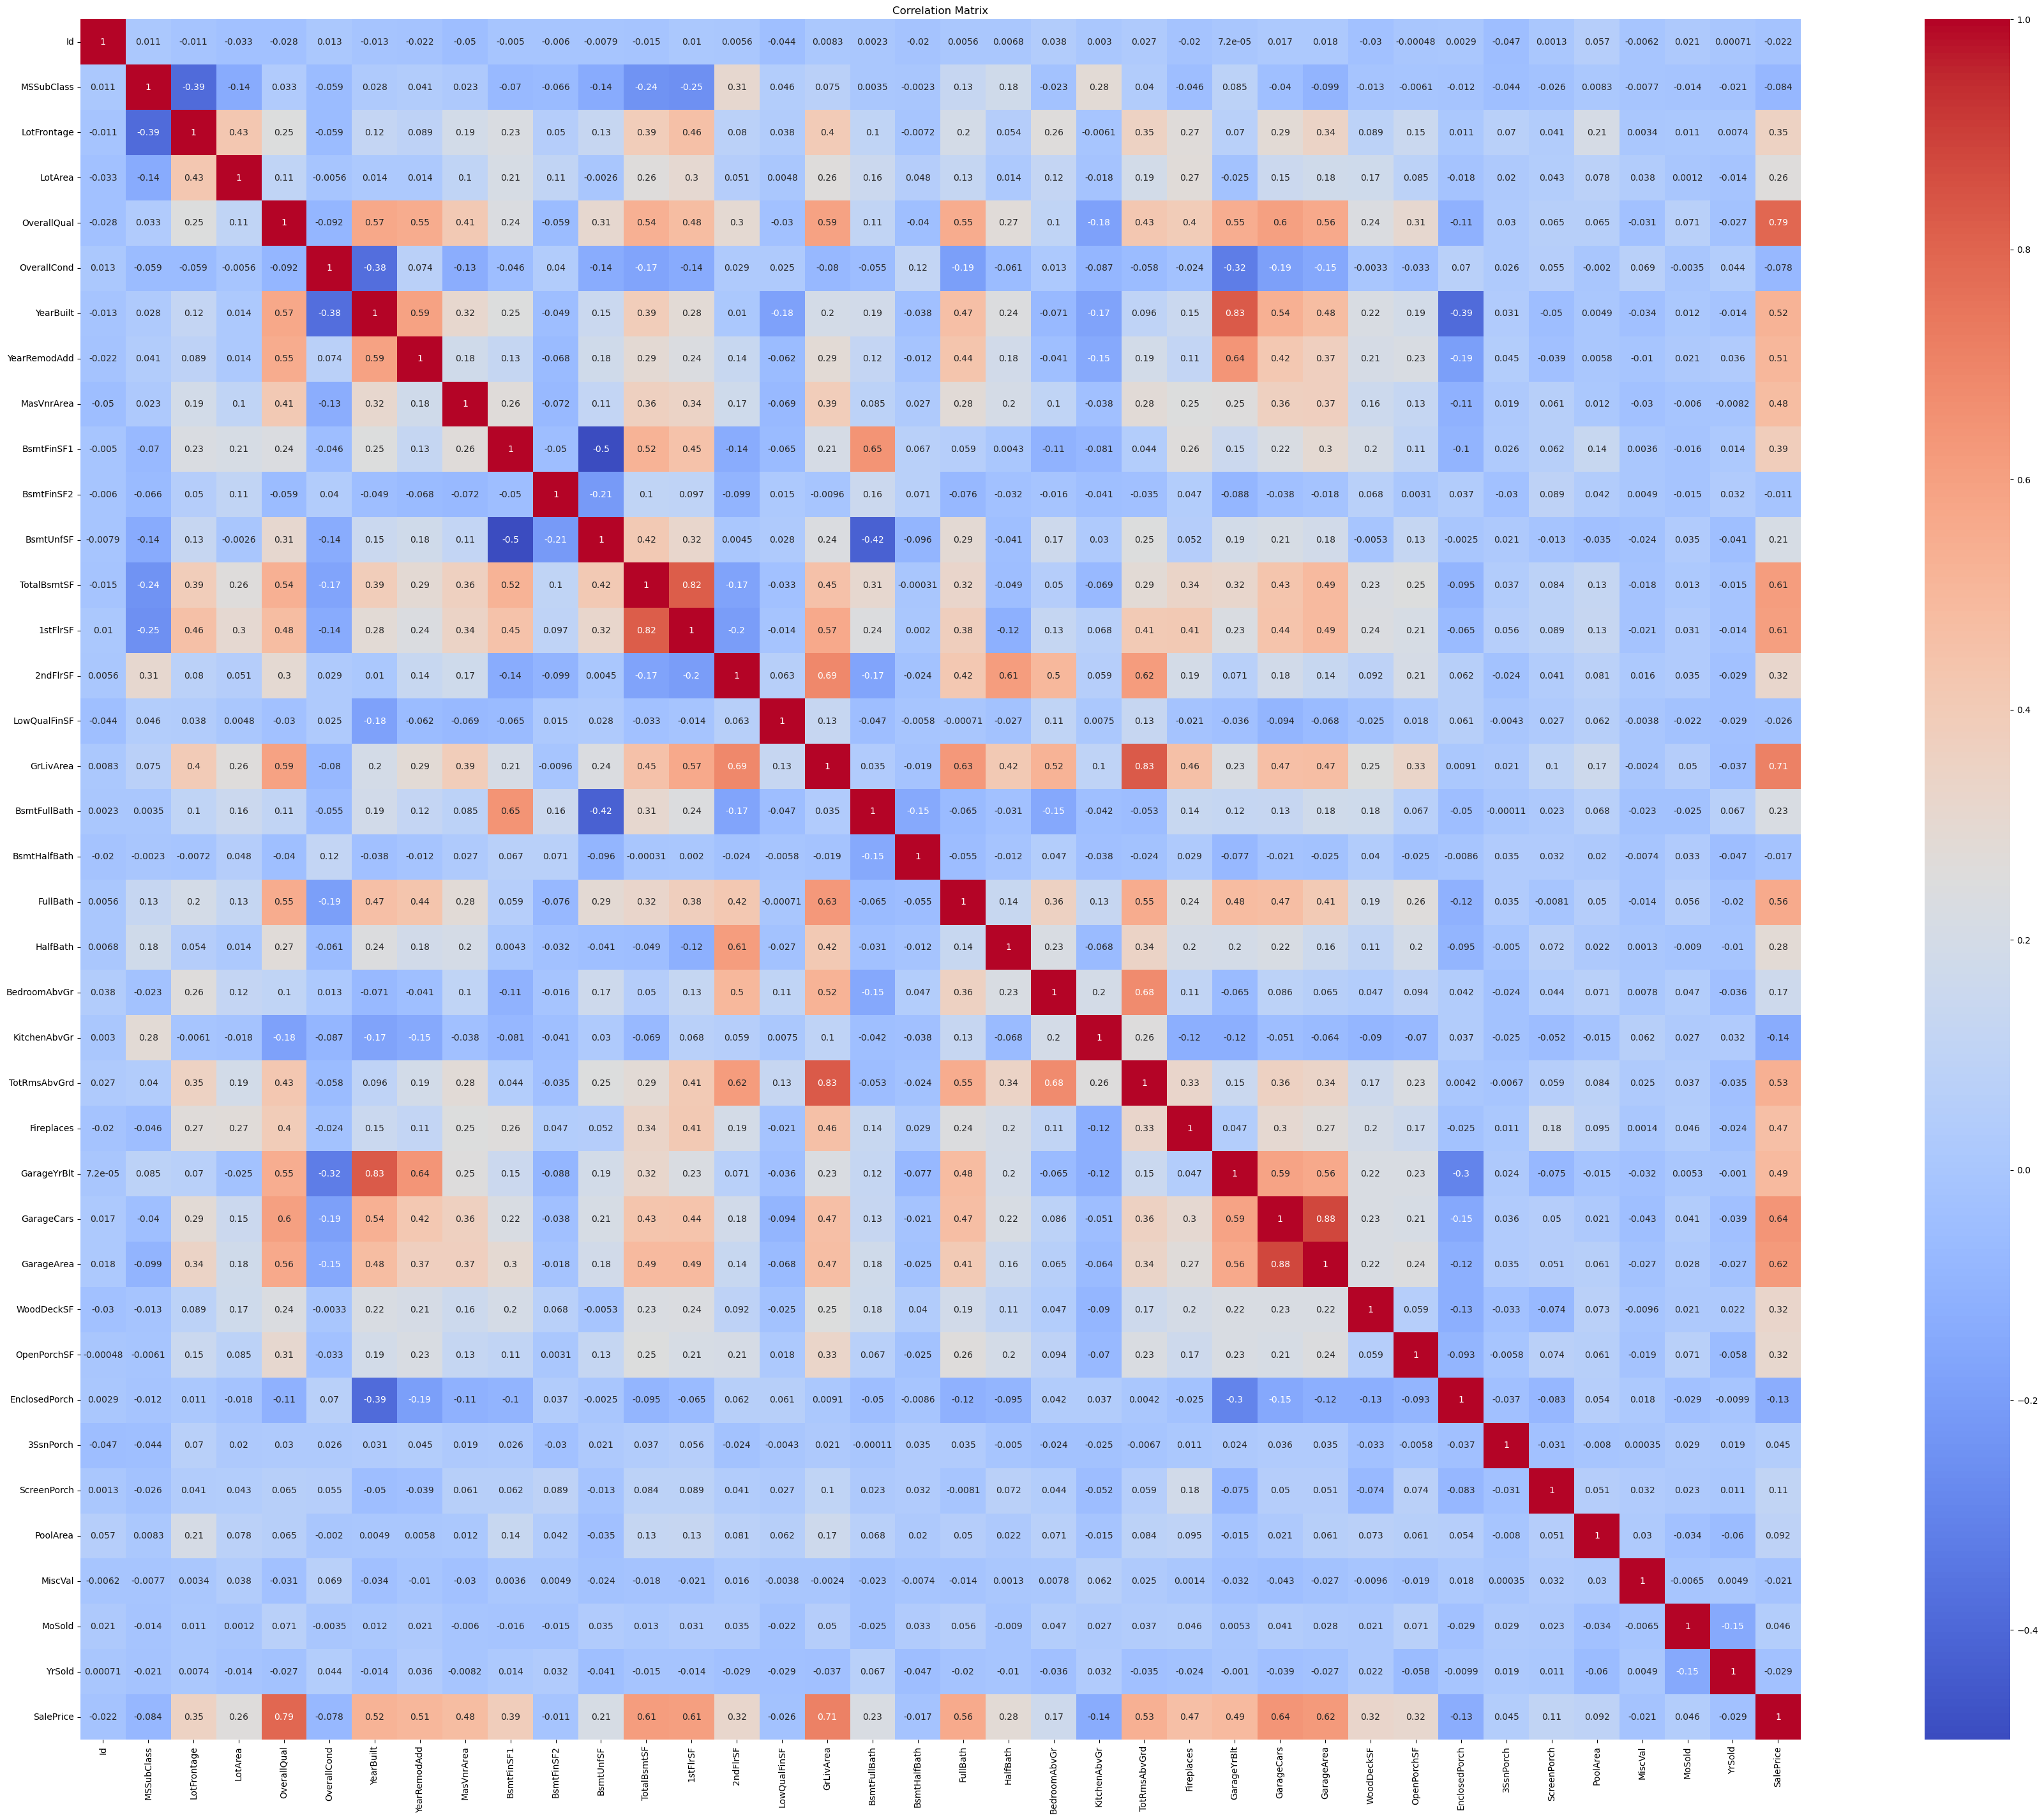

In [38]:
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(50, 35))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

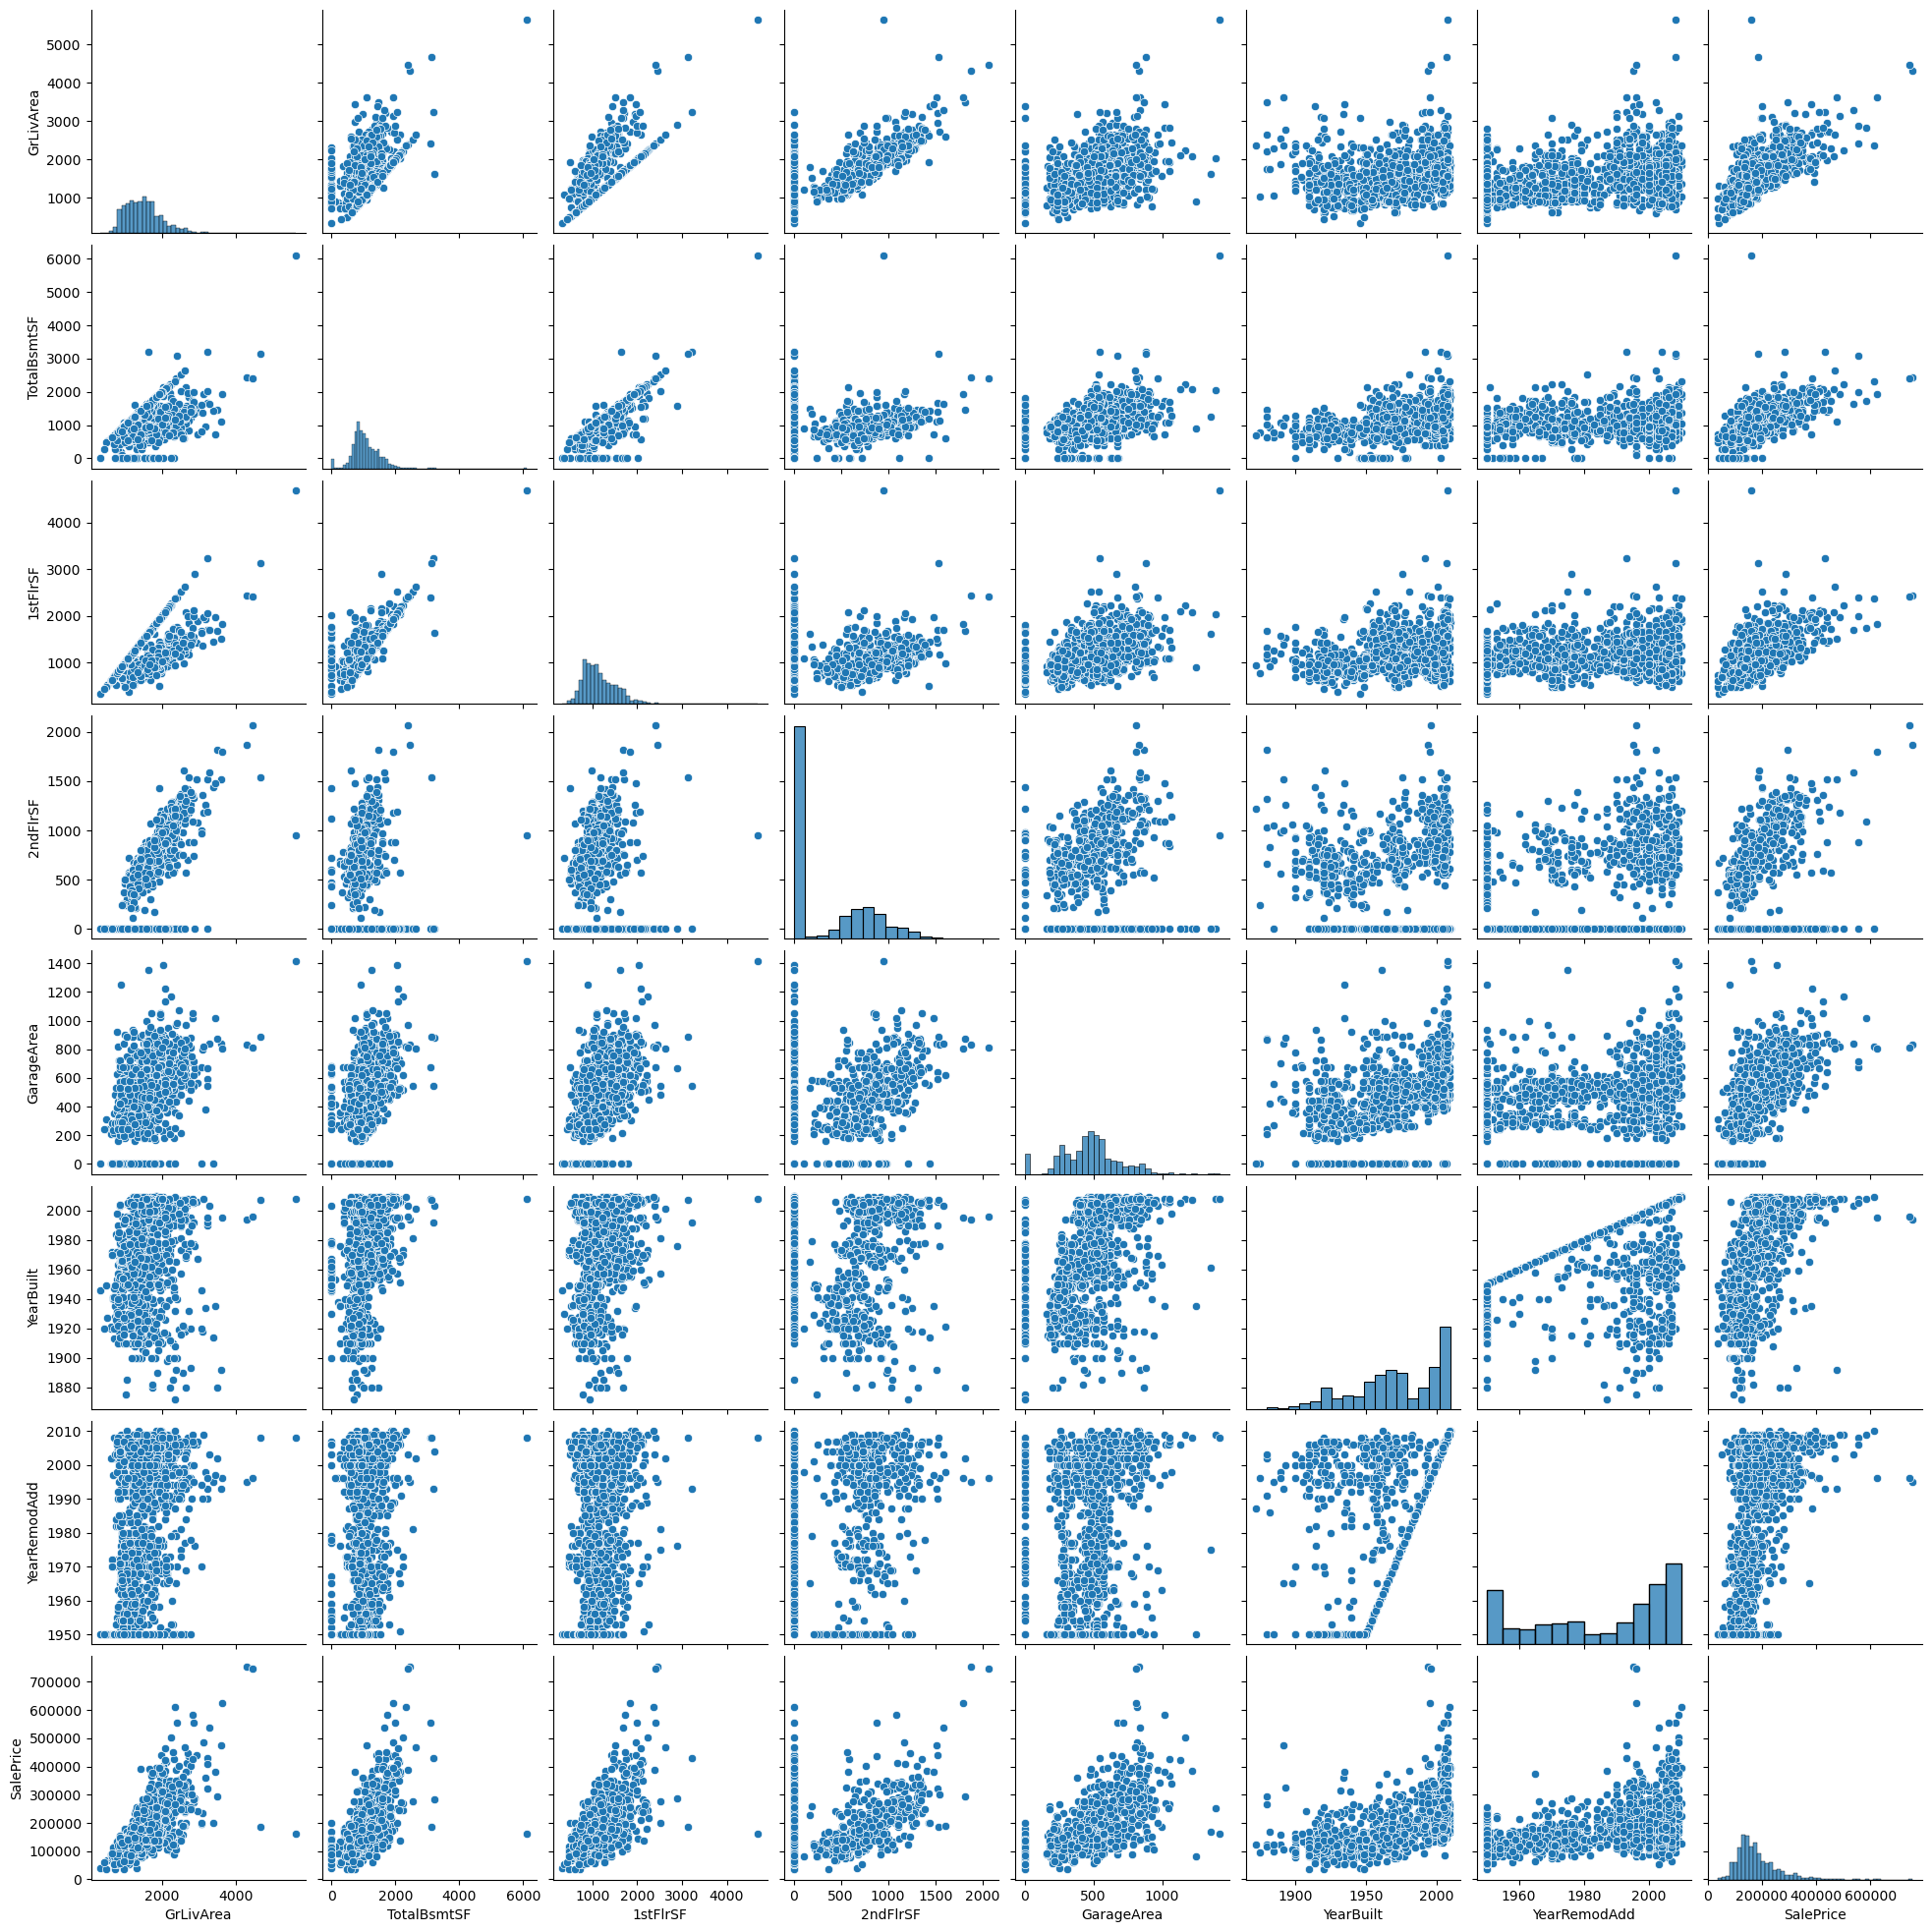

In [39]:
# pair plot
num_vars = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

sns.pairplot(df[num_vars])

# Dealing with missing values (Pre-Processing Part I)

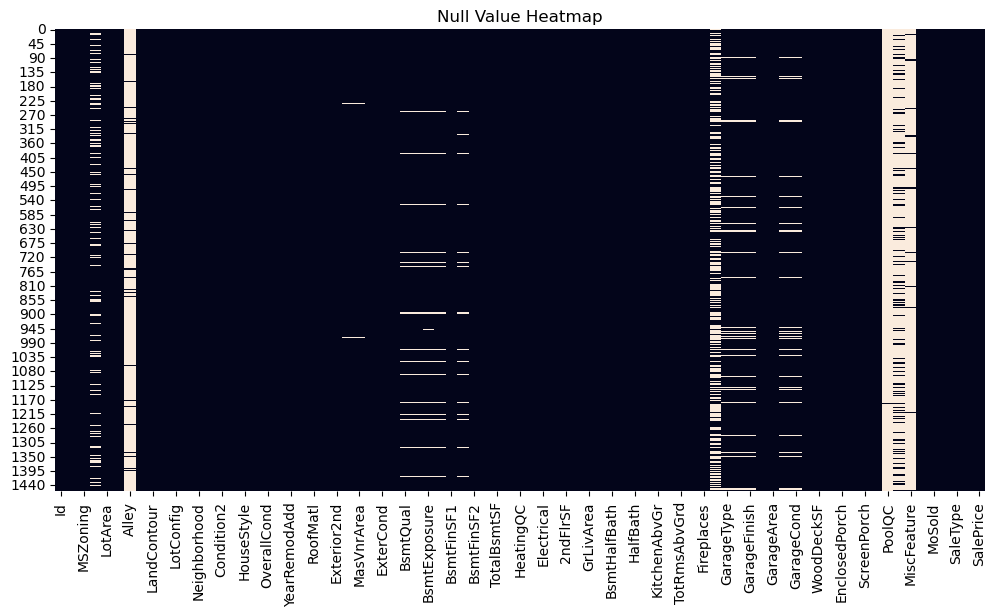

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null Value Heatmap')
plt.show()

In [41]:
null_cols = df.columns[df.isnull().any()].tolist()
null_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [42]:
null_percentages = (df[null_cols].isnull().sum() / len(df)) * 100
null_percentages

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [43]:
# Get the columns with null percentages greater than 45%
columns_to_drop = null_percentages[null_percentages > 45].index

# Drop columns with more than 45% null values
df.drop(columns=columns_to_drop, inplace=True)

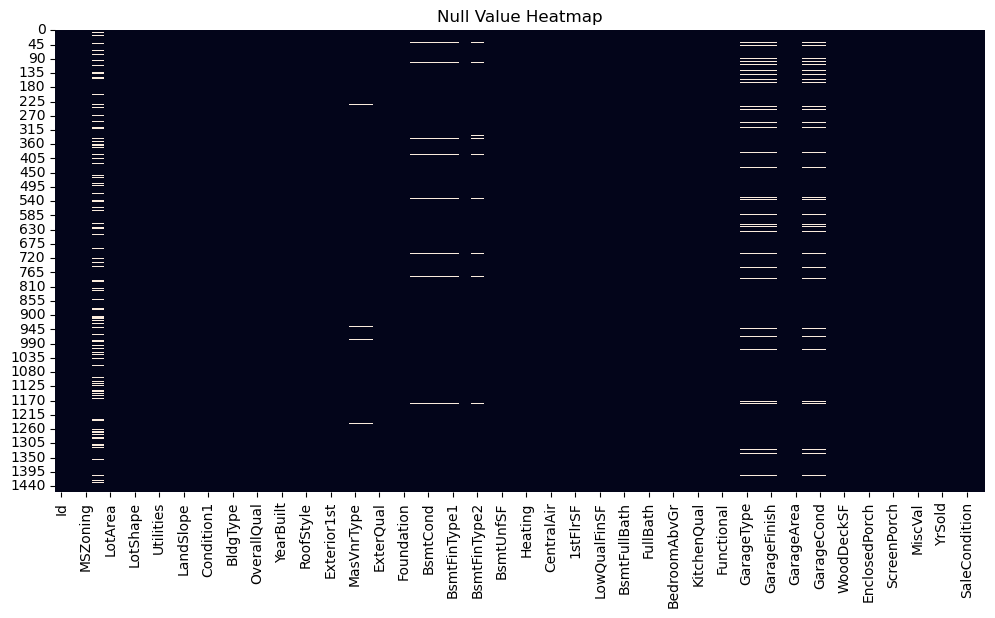

In [44]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null Value Heatmap')
plt.show()

In [45]:
# Fill missing values in numerical columns with the mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

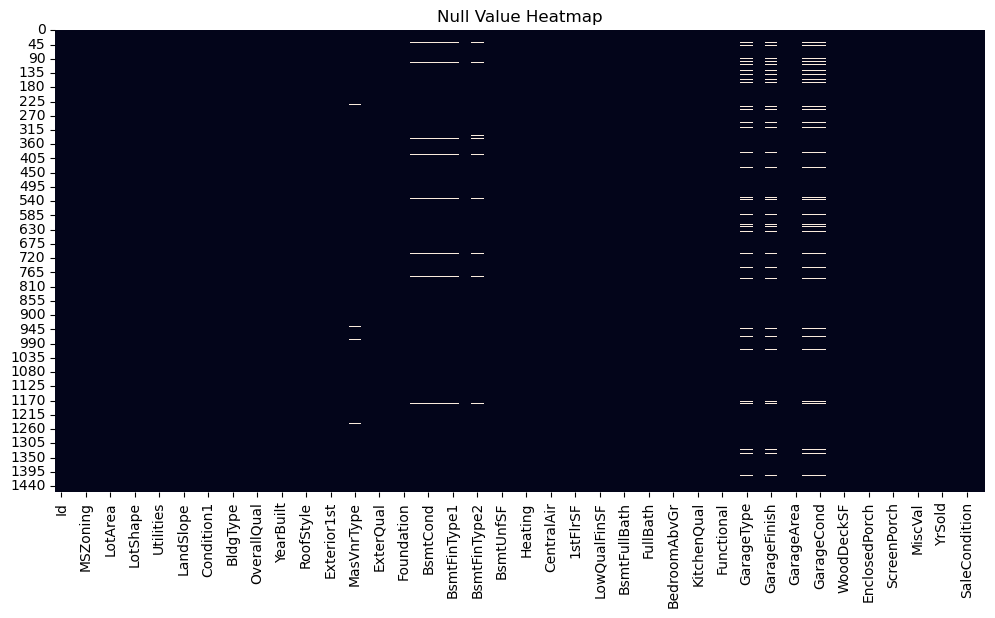

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null Value Heatmap')
plt.show()

In [47]:
# Fill missing values in categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

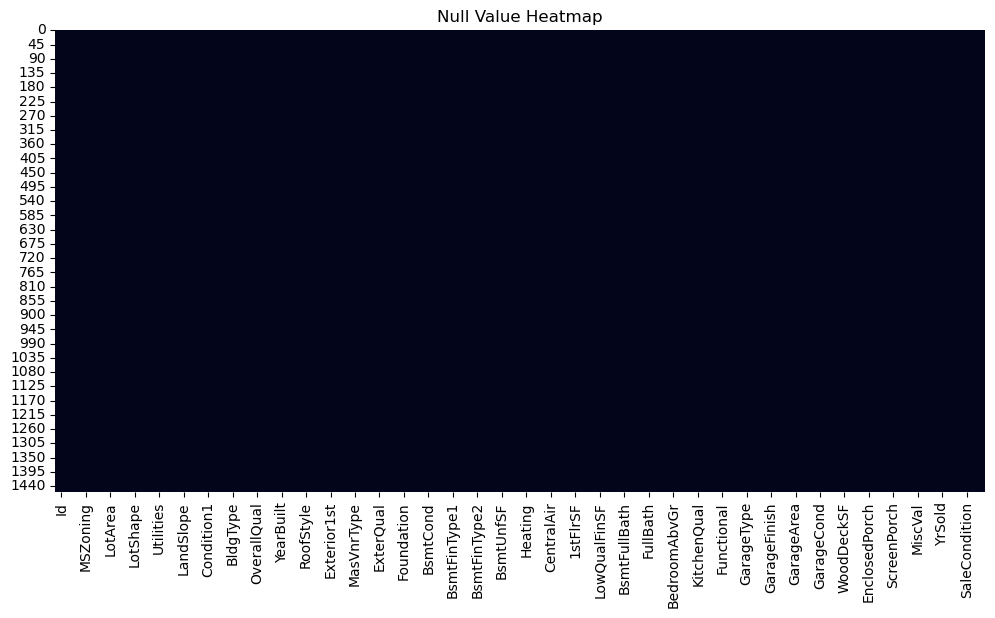

In [48]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null Value Heatmap')
plt.show()

In [49]:
df.shape

(1460, 76)

In [50]:
# One Hot Encoding (Pre-Processing Part II)

In [51]:
''' Creating a function that will convert all the categorical values to numerical values
by getting the dummy variables using the pandas library '''

def category_onehot_multcols(multicolumns):
    df_final = final_df
    i = 0
    for fields in multicolumns:

        print(fields)
        df1 = pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i == 0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i = i+1


    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [52]:
main_df = df.copy()

In [53]:
# Combine test data

test_df = pd.read_csv(r"handled_test.csv")

In [54]:
test_df.shape

(1459, 80)

In [55]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave  Grvl      Reg   
1  1462          20       RL         81.0    14267   Pave  Grvl      IR1   
2  1463          60       RL         74.0    13830   Pave  Grvl      IR1   
3  1464          60       RL         78.0     9978   Pave  Grvl      IR1   
4  1465         120       RL         43.0     5005   Pave  Grvl      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0     Ex  MnPrv        Shed   
1         Lvl    AllPub  ...           0        0     Ex  MnPrv        Gar2   
2         Lvl    AllPub  ...           0        0     Ex  MnPrv        Shed   
3         Lvl    AllPub  ...           0        0     Ex  MnPrv        Shed   
4         HLS    AllPub  ...         144        0     Ex  MnPrv        Shed   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [56]:
# Now, I'll combine my train data that is present inside the df and test_df row wise

final_df = pd.concat([df,test_df], axis = 0)

In [57]:
final_df.shape

(2919, 81)

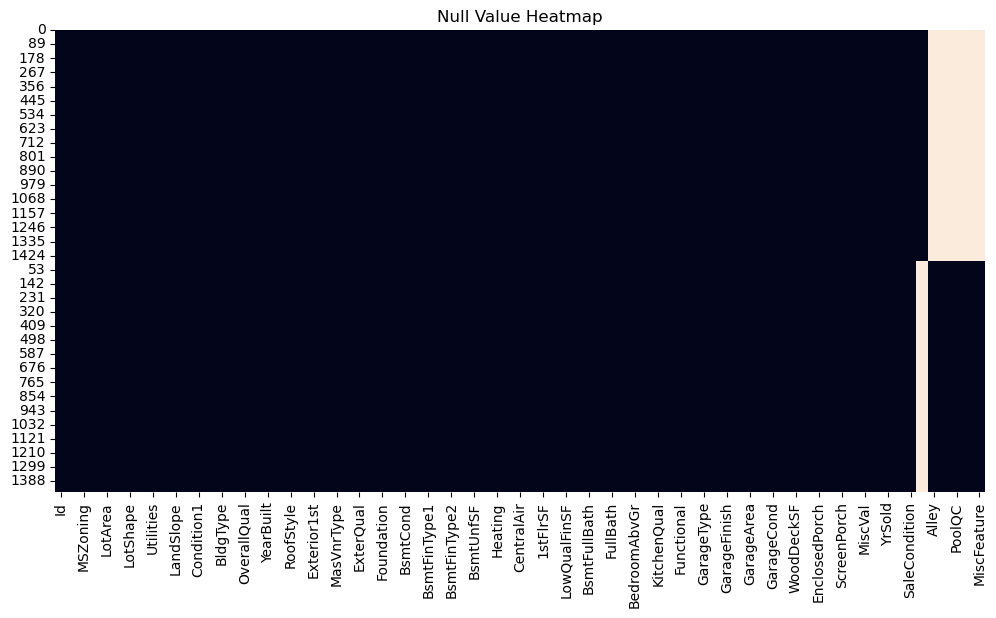

In [58]:
plt.figure(figsize=(12, 6))
sns.heatmap(final_df.isnull(), cbar=False)
plt.title('Null Value Heatmap')
plt.show()

In [59]:
# Replace 'SalePrice' with the actual column name if different
columns_to_drop = final_df.columns[final_df.isnull().any()].tolist()
columns_to_drop.remove('SalePrice')  # Remove 'SalePrice' from the list of columns to drop

# Drop the columns with null values except 'SalePrice'
final_df = final_df.drop(columns=columns_to_drop)

# Print the names of dropped columns
print("Dropped columns:")
print(columns_to_drop)

Dropped columns:
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [60]:
# Select categorical columns for one-hot encoding
categorical_cols = final_df.select_dtypes(include=['object']).columns

In [61]:
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [62]:
final_df = category_onehot_multcols(categorical_cols)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [63]:
final_df.shape

(2919, 234)

In [64]:
# final_df has duplicate columns too, so we'll have to remove the duplicate columns

final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [65]:
final_df.shape  # number of columns will be less because we removed the duplicate columns

(2919, 178)

In [66]:
final_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  ConLI  ConLw  New  Oth  WD  \
0          2003       196.0       706.0  ...      0      0    0    0   1   
1          1976         0.0       978.0  ...      0      0    0    0   1   
2          2002       162.0       486.0  ...      0      0    0    0   1   
3          1970         0.0       216.0  ...      0      0    0    0   1   
4          2000       350.0       655.0  ...      0      0    0    0   1   

   AdjLand  Alloca  Family  Normal  Partial  
0        0       0       0       1        0  
1        0       0       0       1        0  
2        0       0       0       1        0  
3        0       0       0       0        0  
4        0       0       0       1        0  

[5 rows x 178 columns]

# Regression 

In [67]:
# Now, again we'll divide it into training datasets and test datasets

df_Train = final_df.iloc[:1460,:]
df_Test = final_df.iloc[1460:,:]

In [68]:
# dropping the saleprice column from the test data set because all are null values
df_Test.drop(['SalePrice'], axis = 1, inplace = True)

C:\Users\2005m\AppData\Local\Temp\ipykernel_17900\1487717145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'], axis = 1, inplace = True)


In [69]:
df_Test.shape

(1459, 177)

In [70]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [72]:
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(df_Test)
y_pred

array([113451.36891477, 146756.69118151, 185972.13979187, ...,
       178669.61211312, 104148.16377174, 241270.86174752])

In [75]:
# Creating submission file to submit
pred = pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis = 1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('Final_Submission.csv', index = False)